In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_test3', compile=False)

In [3]:
phis=[0.93,1.0,1.10] 
Ts=[1160,1200,1130]

name_11='State_space_cte_pressure_T' 
name_12='_phi_'
name_21='Reaction_rates_cte_pressure_T'
name_22='_phi_'

end='.csv'

In [4]:
def hydrogen_data_clean_shift_sandiego_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:12]
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    n_columns_source=np.shape(cantera_sources)[1]
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[0,1:]
    maximum_values=maximum_values.to_numpy()
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
k1=2
cantera_species=pd.read_csv(name_11+str(Ts[k1])+name_12+str(phis[k1])+end)
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(name_21+str(Ts[k1])+name_22+str(phis[k1])+end)
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv('maximum_values_Phi_T_Sampling.csv')
maximum_values=pd.DataFrame(maximum_values)

In [6]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_sandiego_cantera(cantera_species,cantera_sources,maximum_values)

In [7]:
temperature_data=cantera_species.loc[:,'T[K]']
time_data=cantera_species.loc[:,'t[s]']

T_gradient=np.gradient(temperature_data)   
T_grad_max=np.argmax(T_gradient)
IDT=time_data.iloc[T_grad_max]
print(IDT)

6.76000000000008e-05


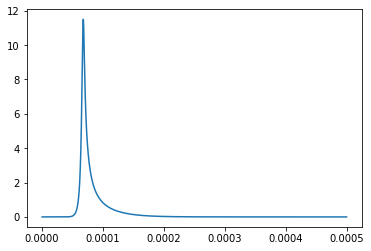

In [8]:
plt.plot(time_data,T_gradient)

In [9]:
dataset_copy=dataset.iloc[T_grad_max:,:]
dataset_copy

,t[s],T[K],H2,H,O2,OH,O,H2O,HO2,H2O2,...,HO2shift,H2O2shift,H2wshift,Hwshift,O2wshift,OHwshift,Owshift,H2Owshift,HO2wshift,H2O2wshift
675,0.1352,0.561279,0.317650,0.895385,0.347297,0.423906,0.671017,0.634941,0.394599,0.758567,...,0.381691,0.776026,-6.181770e-01,3.703511e-01,-7.059043e-01,9.143337e-01,6.380126e-01,6.686327e-01,-7.327686e-01,6.148120e-01
676,0.1354,0.565409,0.306338,0.905288,0.334348,0.438922,0.687323,0.646668,0.381691,0.776026,...,0.369430,0.792580,-5.768766e-01,3.136815e-01,-6.706449e-01,9.049895e-01,6.097205e-01,6.308659e-01,-6.894887e-01,5.763141e-01
677,0.1356,0.569532,0.295678,0.913843,0.321935,0.453910,0.703060,0.657836,0.369430,0.792580,...,0.357852,0.808116,-5.347467e-01,2.571795e-01,-6.339668e-01,8.924852e-01,5.785806e-01,5.921044e-01,-6.450251e-01,5.344493e-01
678,0.1358,0.573641,0.285698,0.921027,0.310095,0.468813,0.718144,0.668412,0.357852,0.808116,...,0.346983,0.822529,-4.923554e-01,2.016121e-01,-5.963509e-01,8.770034e-01,5.448940e-01,5.528684e-01,-6.000654e-01,4.895932e-01
679,0.1360,0.577727,0.276420,0.926835,0.298860,0.483577,0.732495,0.678376,0.346983,0.822529,...,0.336835,0.835725,-4.502553e-01,1.477009e-01,-5.582811e-01,8.587818e-01,5.090197e-01,5.136684e-01,-5.552747e-01,4.421869e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,0.9990,0.989192,0.153838,0.139960,0.050045,0.751318,0.160114,0.985861,0.048460,0.020448,...,0.048460,0.020448,-4.538464e-09,-1.099903e-08,-4.775213e-09,-3.333937e-08,-1.426306e-08,1.121513e-08,-7.804183e-09,-2.408601e-09
4995,0.9992,0.989192,0.153838,0.139960,0.050045,0.751318,0.160114,0.985861,0.048460,0.020448,...,0.048460,0.020448,-4.523011e-09,-1.096157e-08,-4.758951e-09,-3.322563e-08,-1.421458e-08,1.117692e-08,-7.777544e-09,-2.400436e-09
4996,0.9994,0.989192,0.153838,0.139960,0.050045,0.751318,0.160114,0.985861,0.048460,0.020448,...,0.048460,0.020448,-4.507609e-09,-1.092424e-08,-4.742745e-09,-3.311294e-08,-1.416599e-08,1.113889e-08,-7.751061e-09,-2.392228e-09
4997,0.9996,0.989192,0.153838,0.139960,0.050045,0.751318,0.160114,0.985861,0.048460,0.020448,...,0.048460,0.020448,-4.492248e-09,-1.088706e-08,-4.726595e-09,-3.299959e-08,-1.411794e-08,1.110092e-08,-7.724638e-09,-2.384122e-09


In [10]:
#Integration test 
Initial_condition=dataset_copy.iloc[:2,1:2+n_columns_mass_fraction]
Initial_condition

,T[K],H2,H,O2,OH,O,H2O,HO2,H2O2
675,0.561279,0.317650,0.895385,0.347297,0.423906,0.671017,0.634941,0.394599,0.758567
676,0.565409,0.306338,0.905288,0.334348,0.438922,0.687323,0.646668,0.381691,0.776026


In [11]:
Initial_condition=Initial_condition.to_numpy()

In [12]:
iterations=np.shape(dataset_copy)[0]
model_outputs=np.zeros((iterations,1+n_columns_mass_fraction))

In [13]:
for i in range(iterations):
    if i==0:
        outs=results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(Initial_condition))).numpy()
        model_outputs[i,:]=outs[0,:]
    else:
        outs=results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(outs))).numpy()
        model_outputs[i,:]=outs[0,:]

In [14]:
model_outputs=pd.DataFrame(model_outputs, columns=columns[1:2+n_columns_mass_fraction])

In [15]:
model_outputs

,T[K],H2,H,O2,OH,O,H2O,HO2,H2O2
0,0.563685,0.309692,0.918566,0.343735,0.441412,0.696073,0.651817,0.370625,0.784589
1,0.566136,0.302360,0.938490,0.329101,0.459109,0.716209,0.663985,0.359360,0.802141
2,0.568792,0.294248,0.956098,0.313379,0.477416,0.735095,0.677095,0.348717,0.817321
3,0.573472,0.283903,0.969149,0.296619,0.498154,0.752497,0.691008,0.336884,0.829702
4,0.580454,0.271562,0.976517,0.279827,0.521467,0.770387,0.704640,0.322386,0.841820
...,...,...,...,...,...,...,...,...,...
4319,0.614673,0.226143,0.955302,0.215851,0.642927,0.850864,0.751663,0.269899,0.881407
4320,0.614673,0.226143,0.955302,0.215851,0.642927,0.850864,0.751663,0.269899,0.881407
4321,0.614673,0.226143,0.955302,0.215851,0.642927,0.850864,0.751663,0.269899,0.881407
4322,0.614673,0.226143,0.955302,0.215851,0.642927,0.850864,0.751663,0.269899,0.881407


In [16]:
interest_vector=['H2O','O2','H2','T[K]','OH','HO2','H2O2']

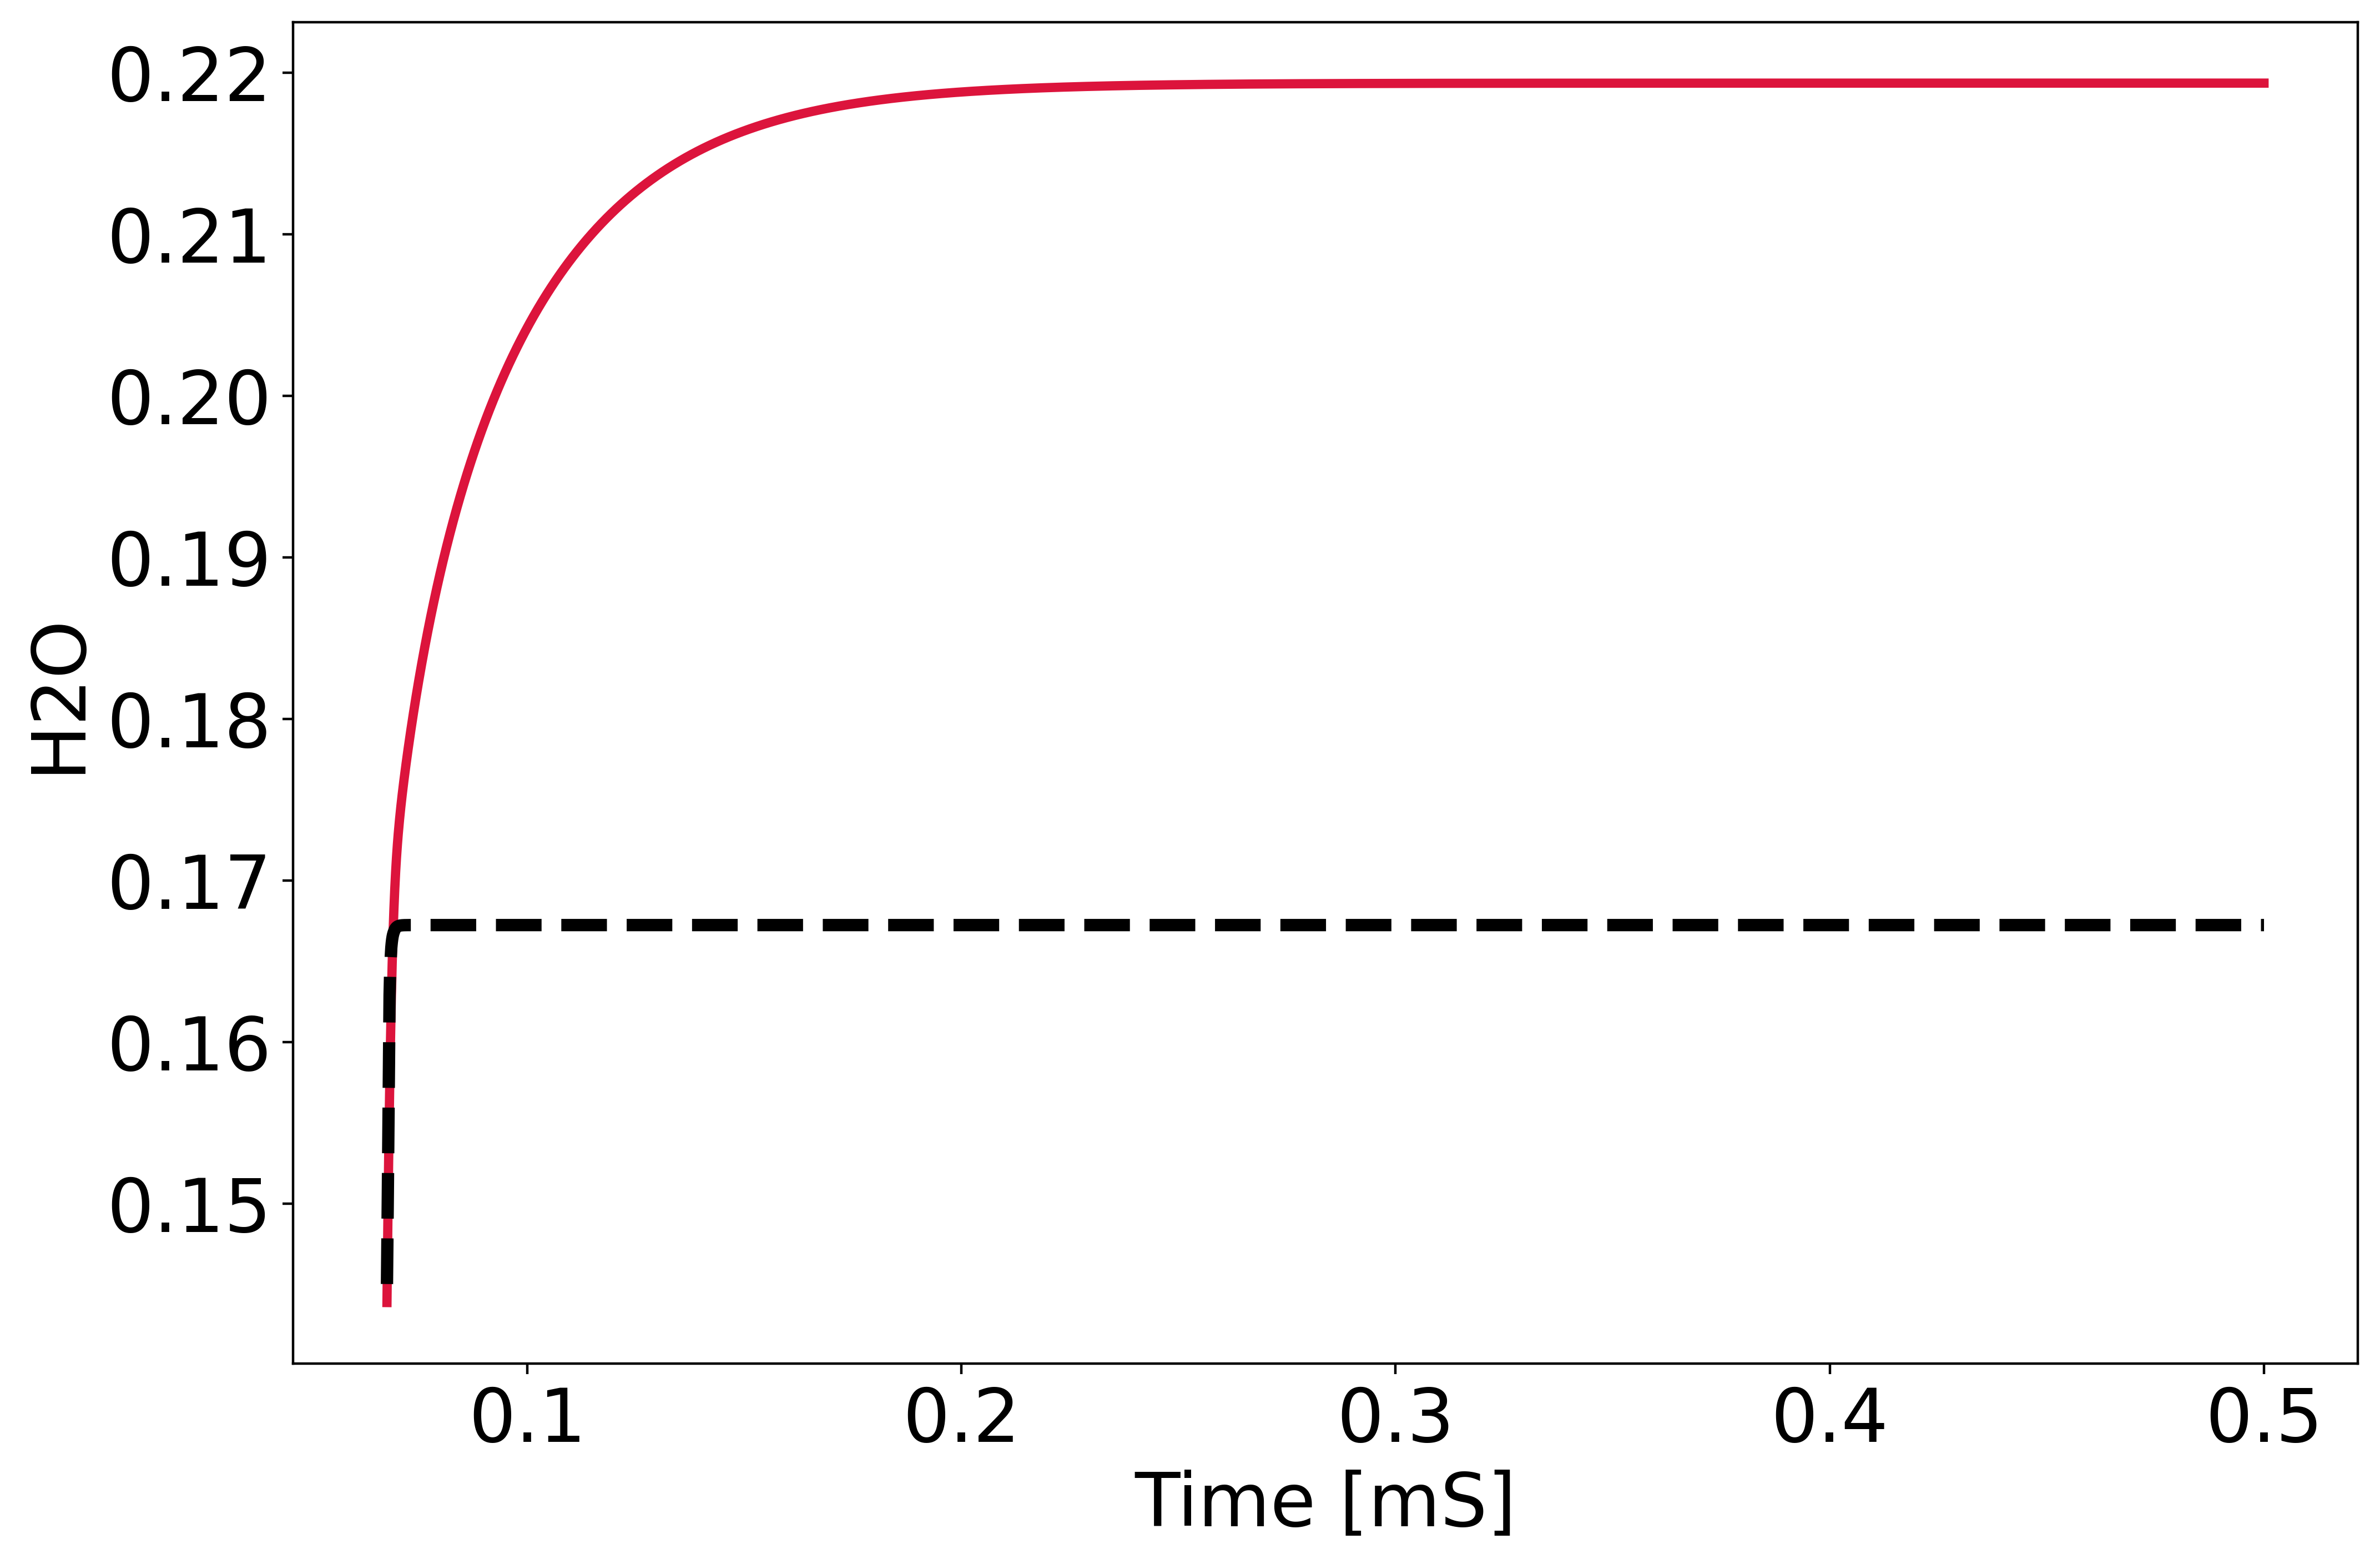

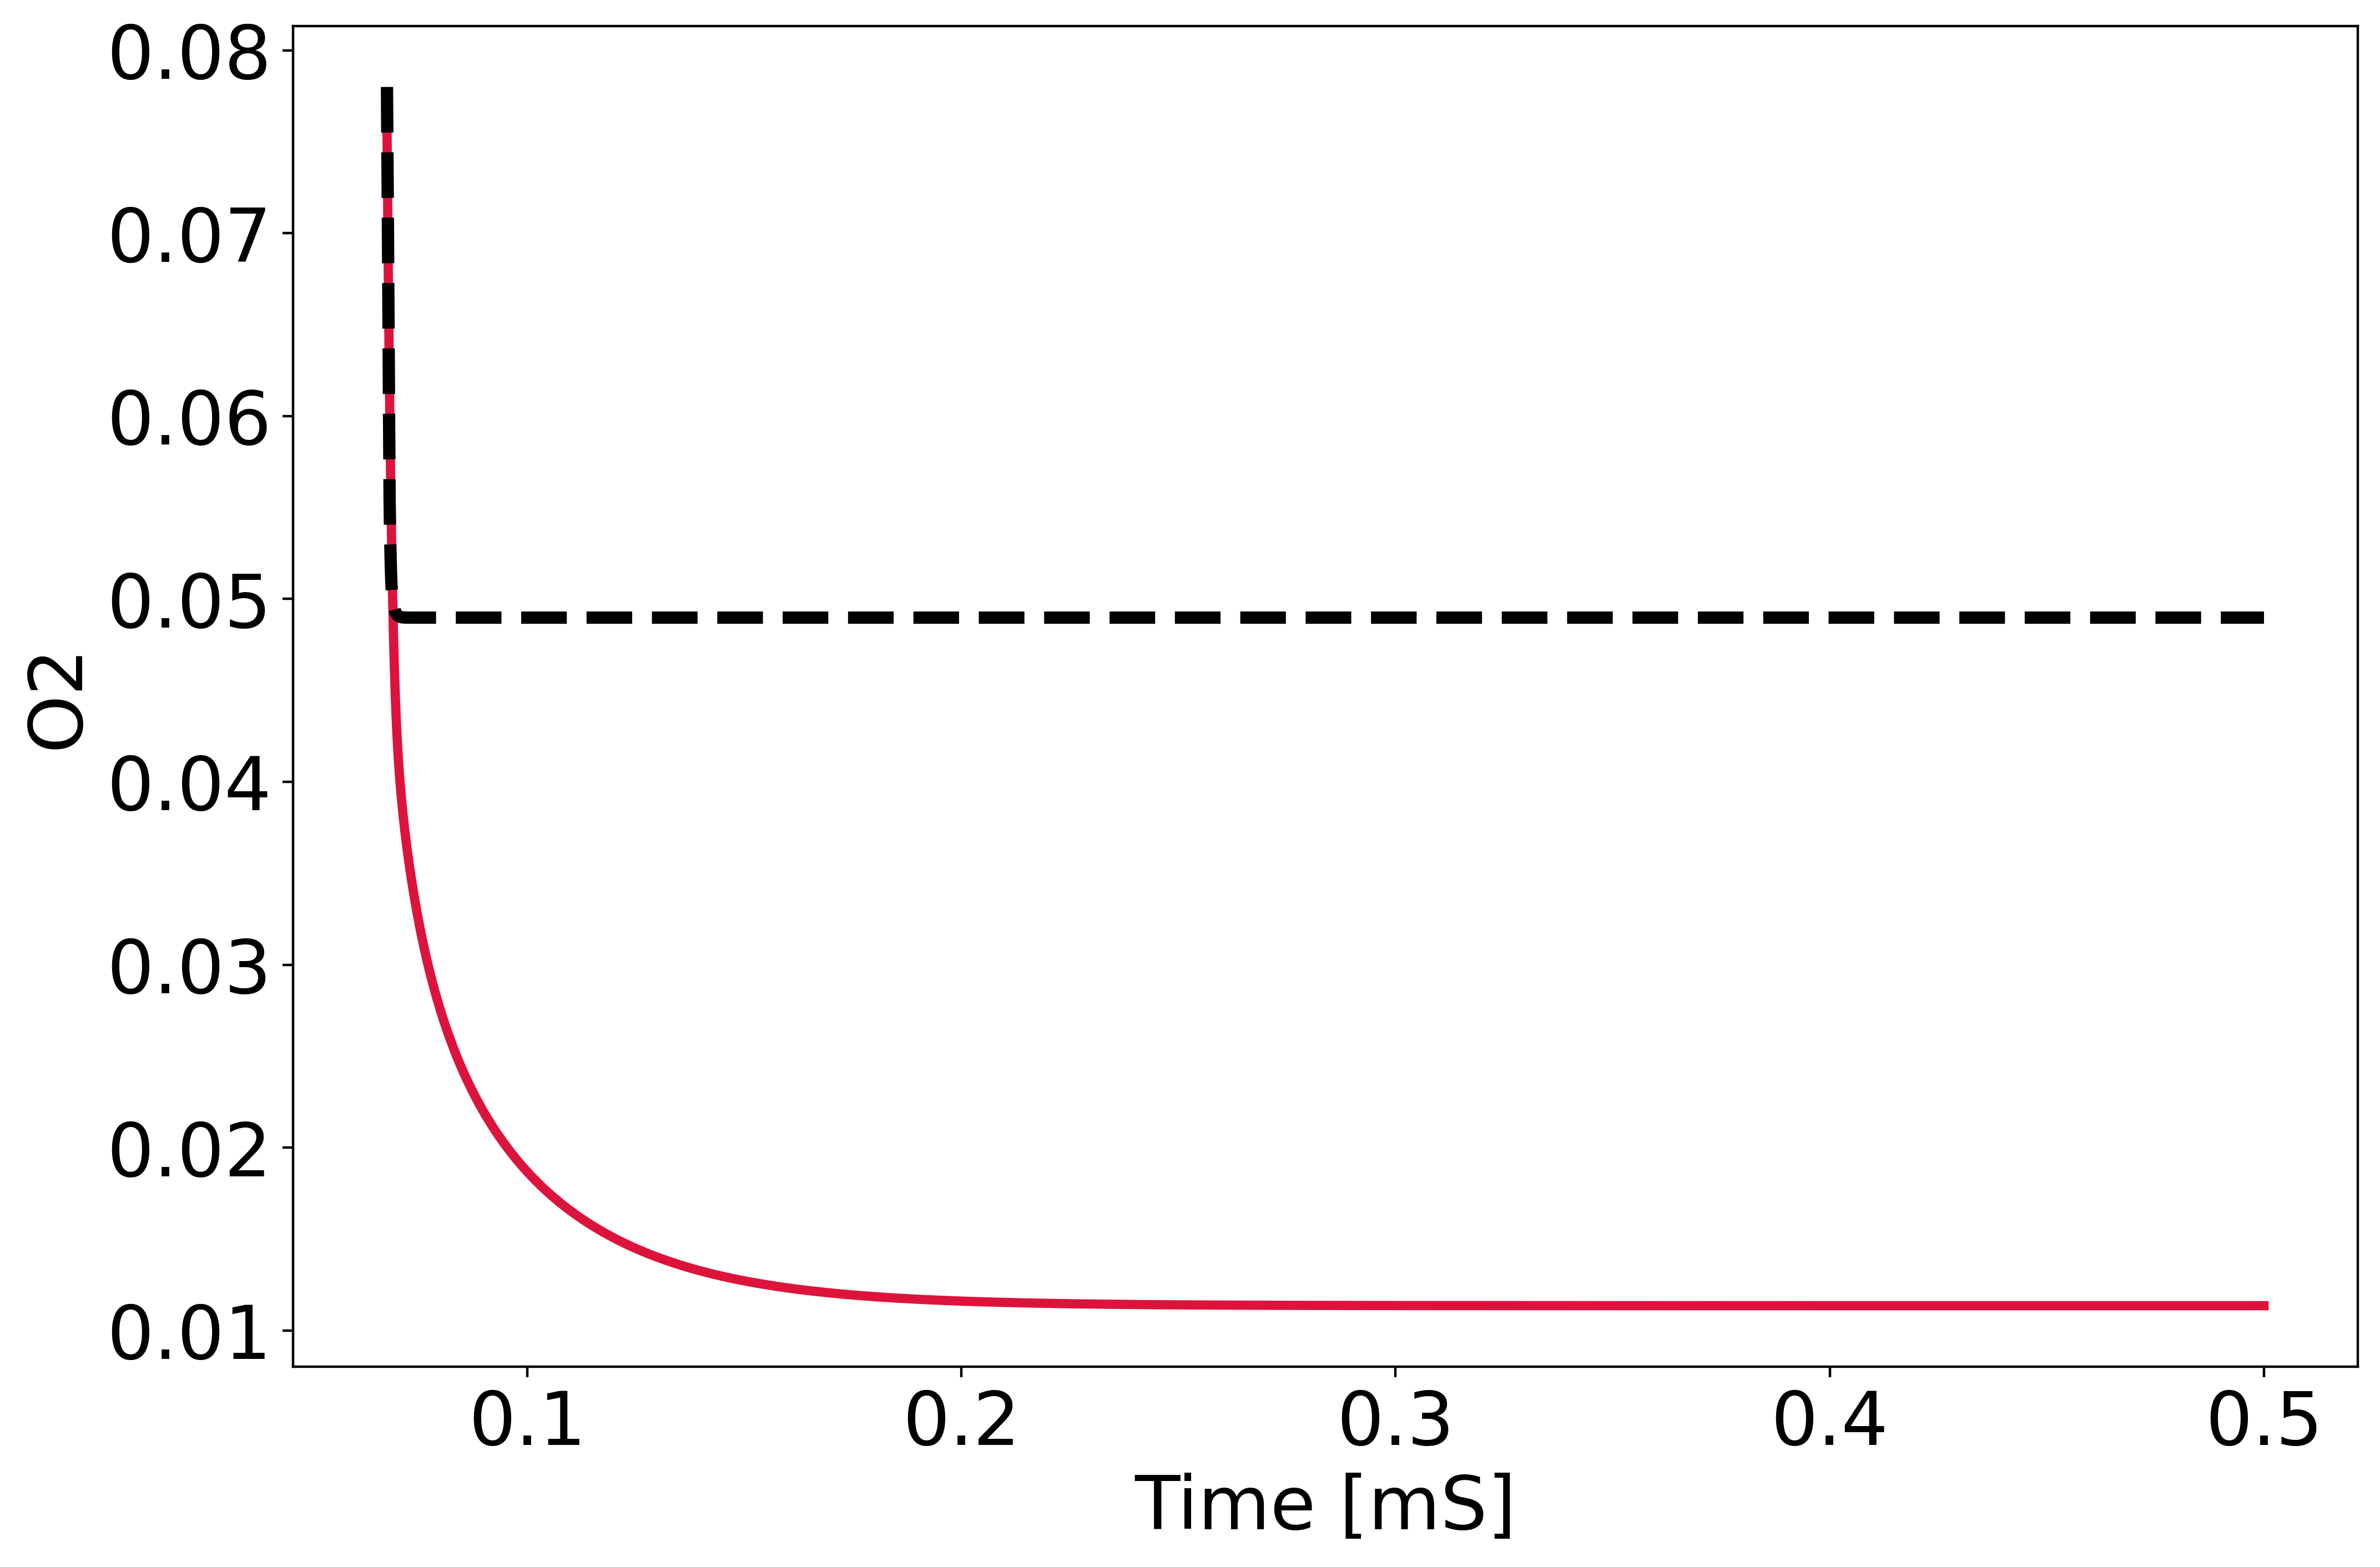

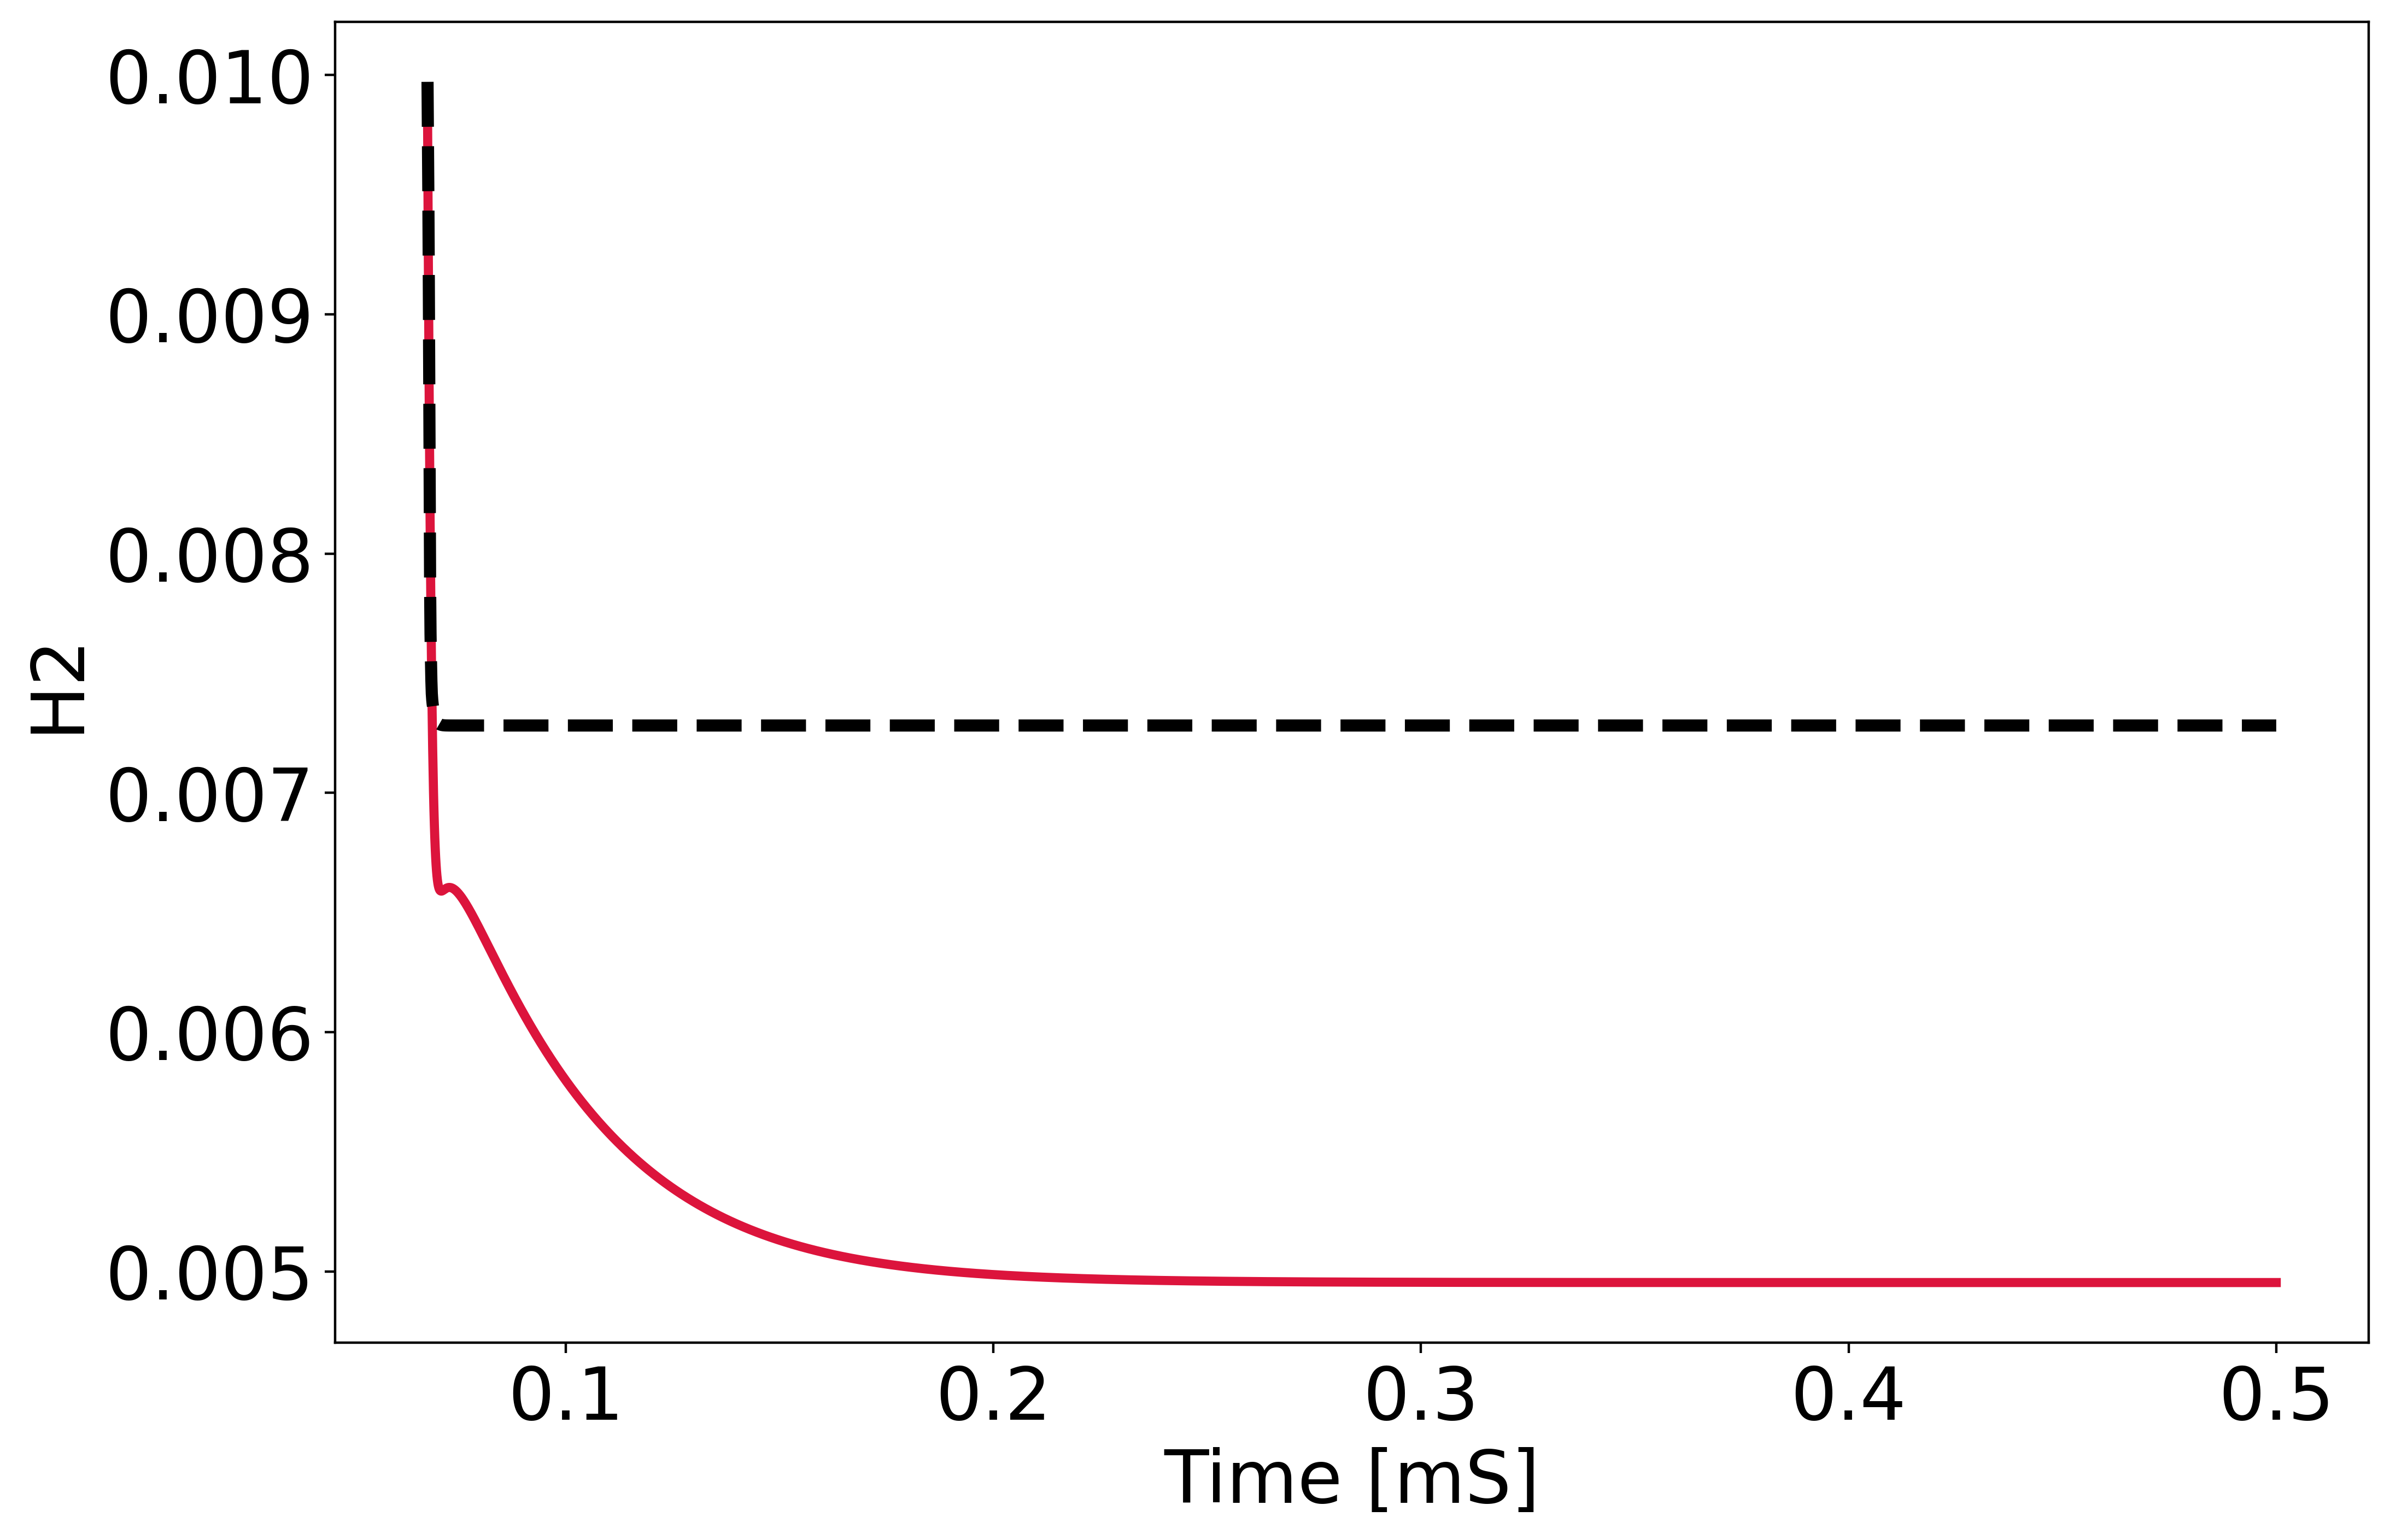

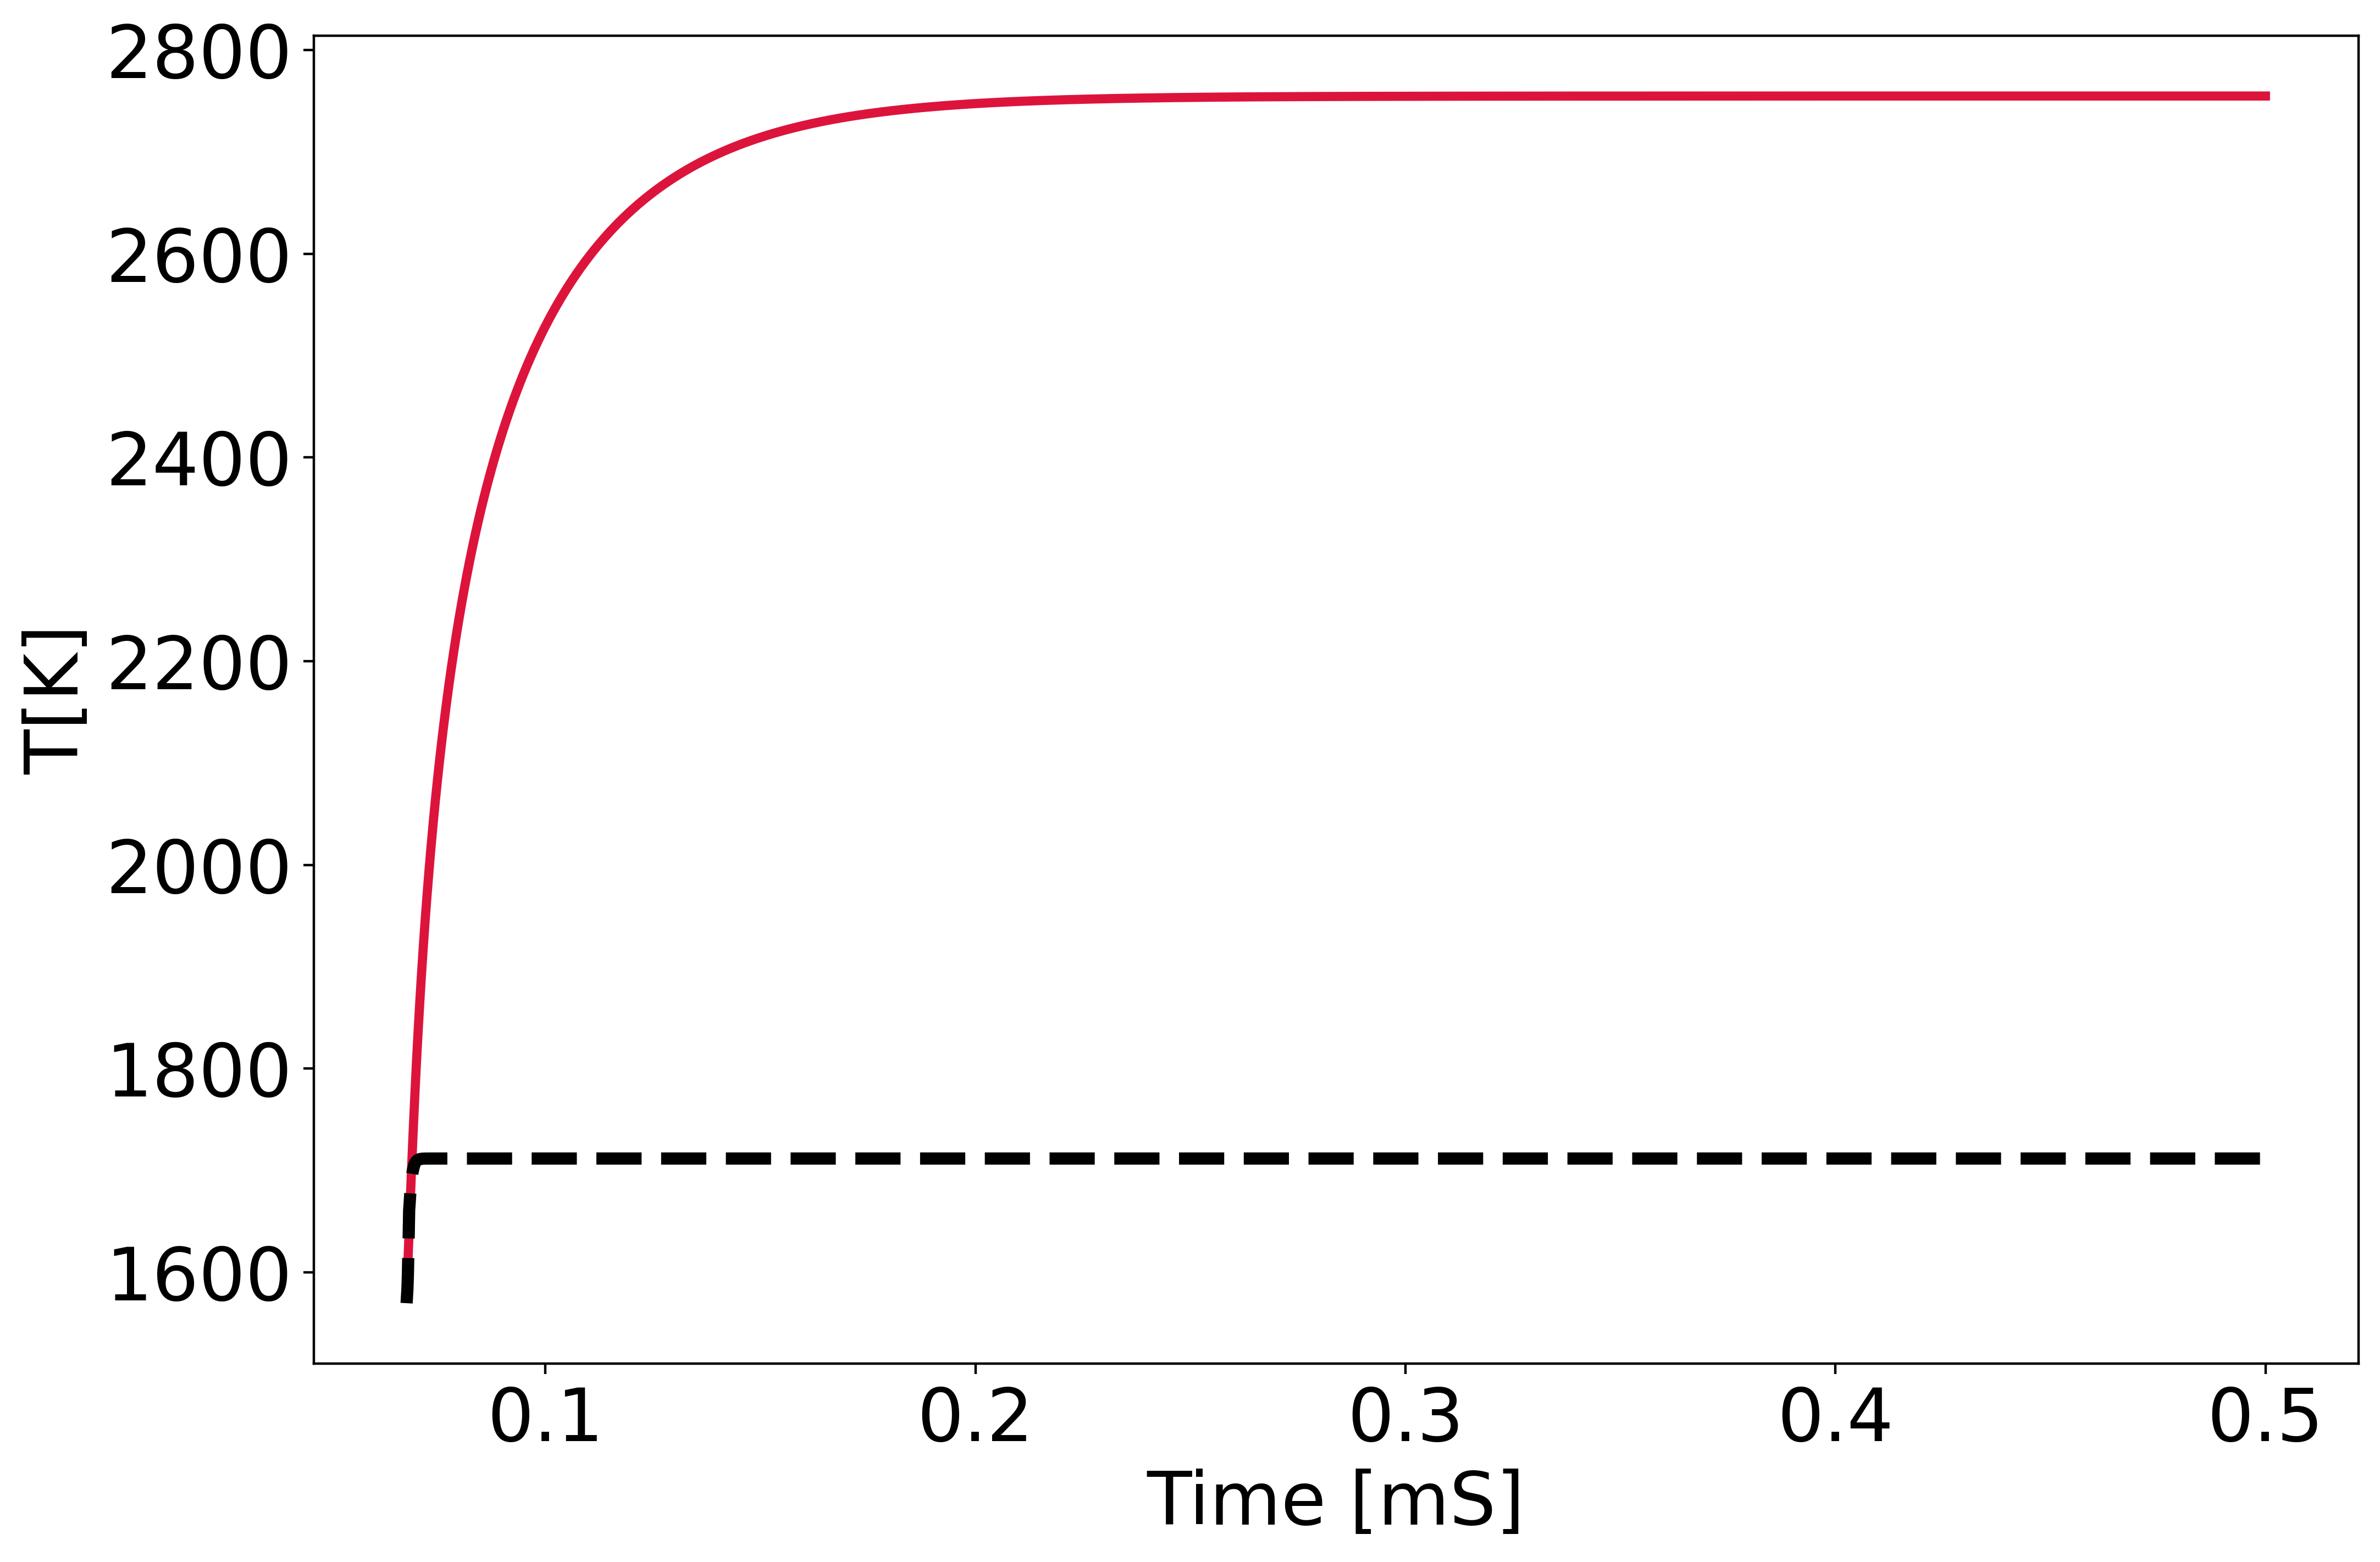

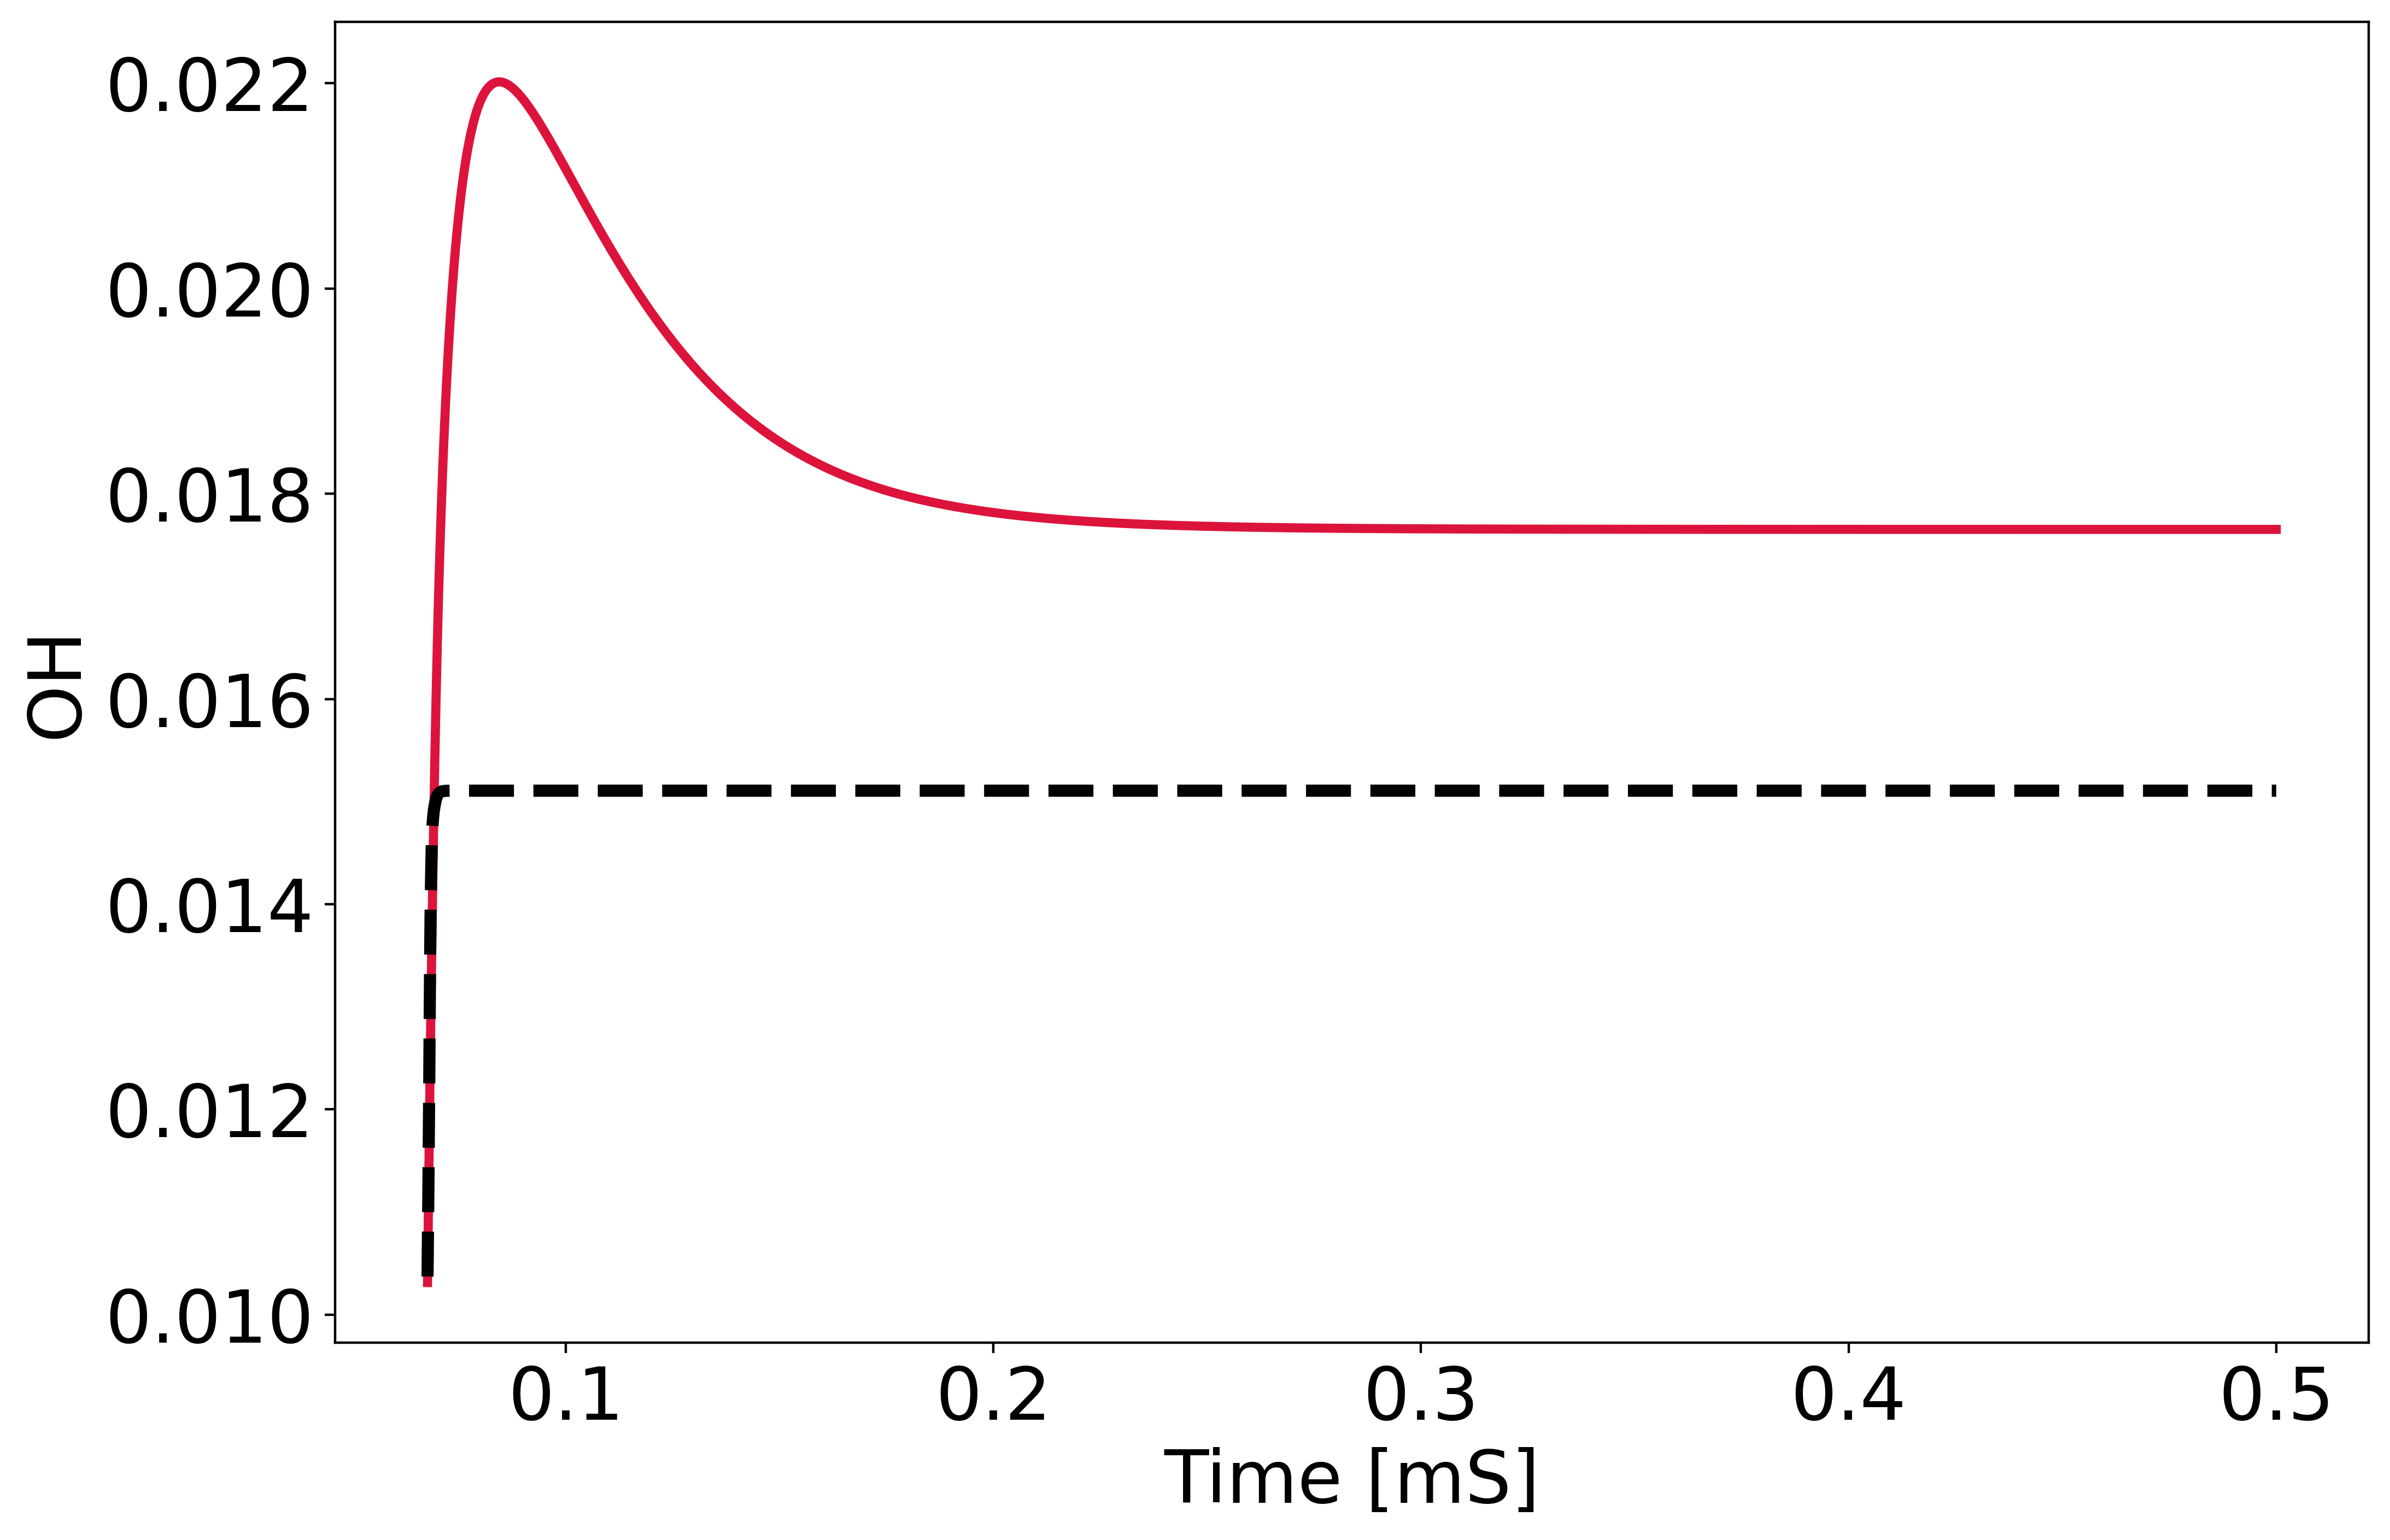

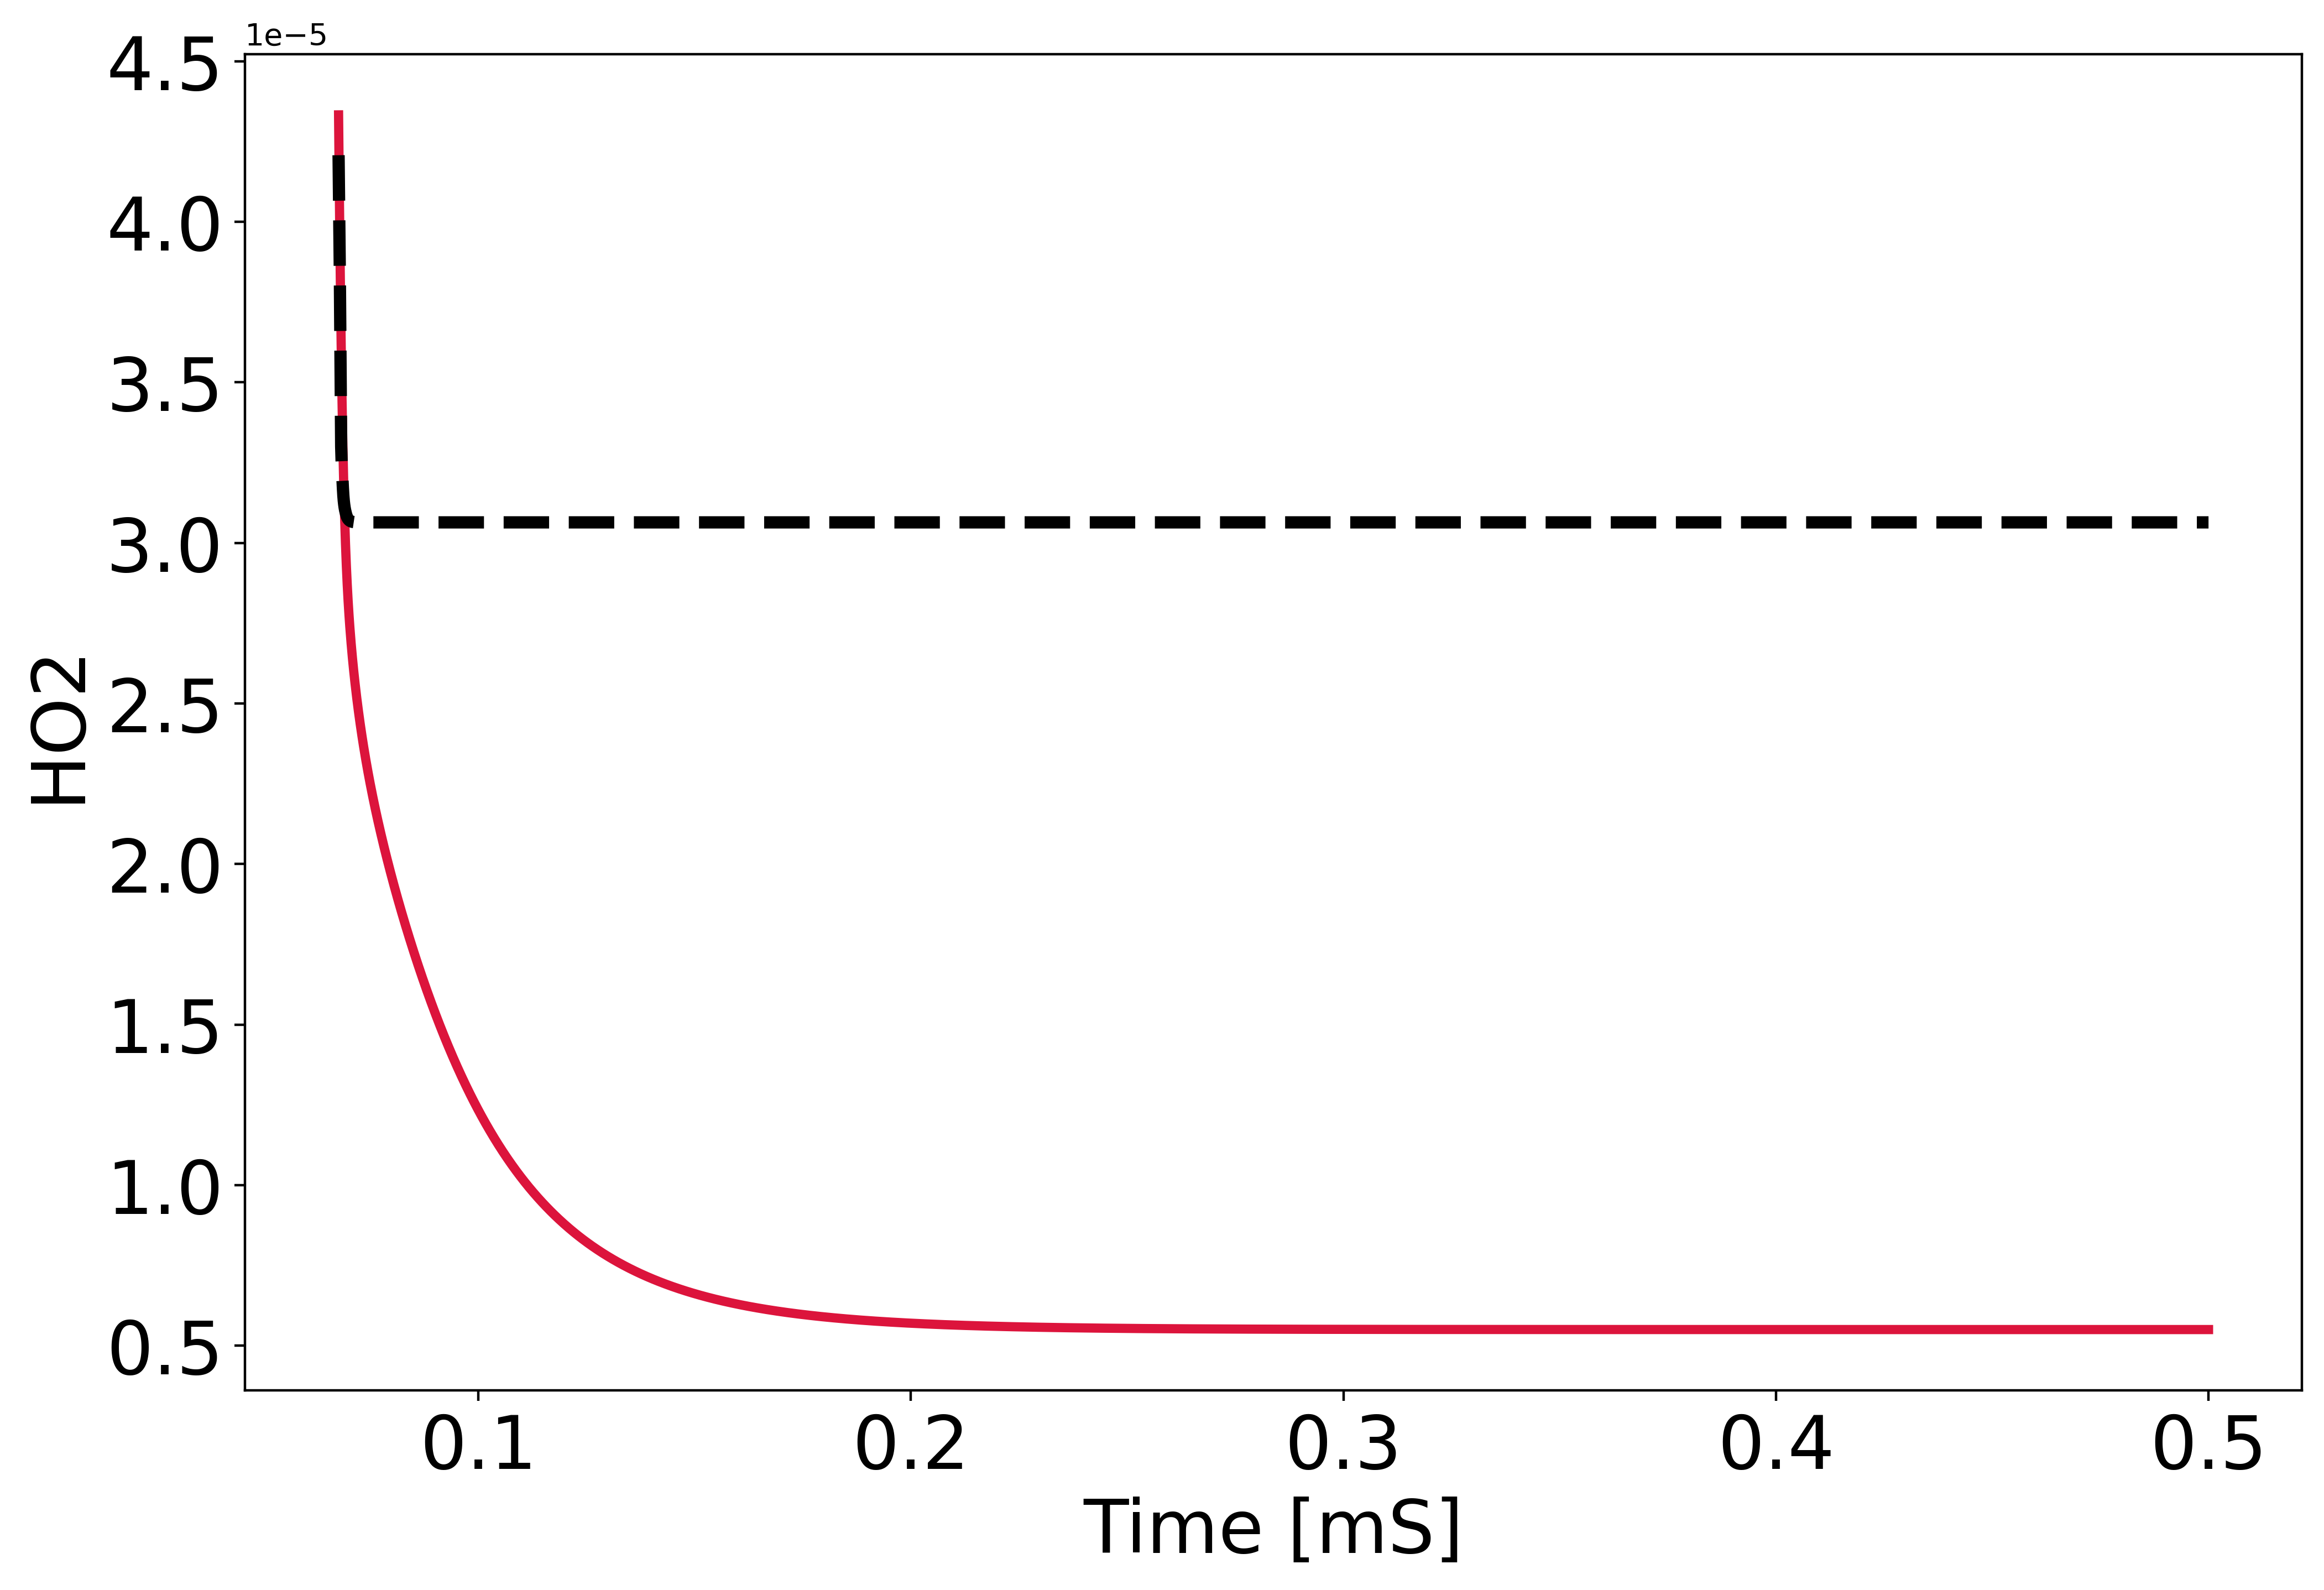

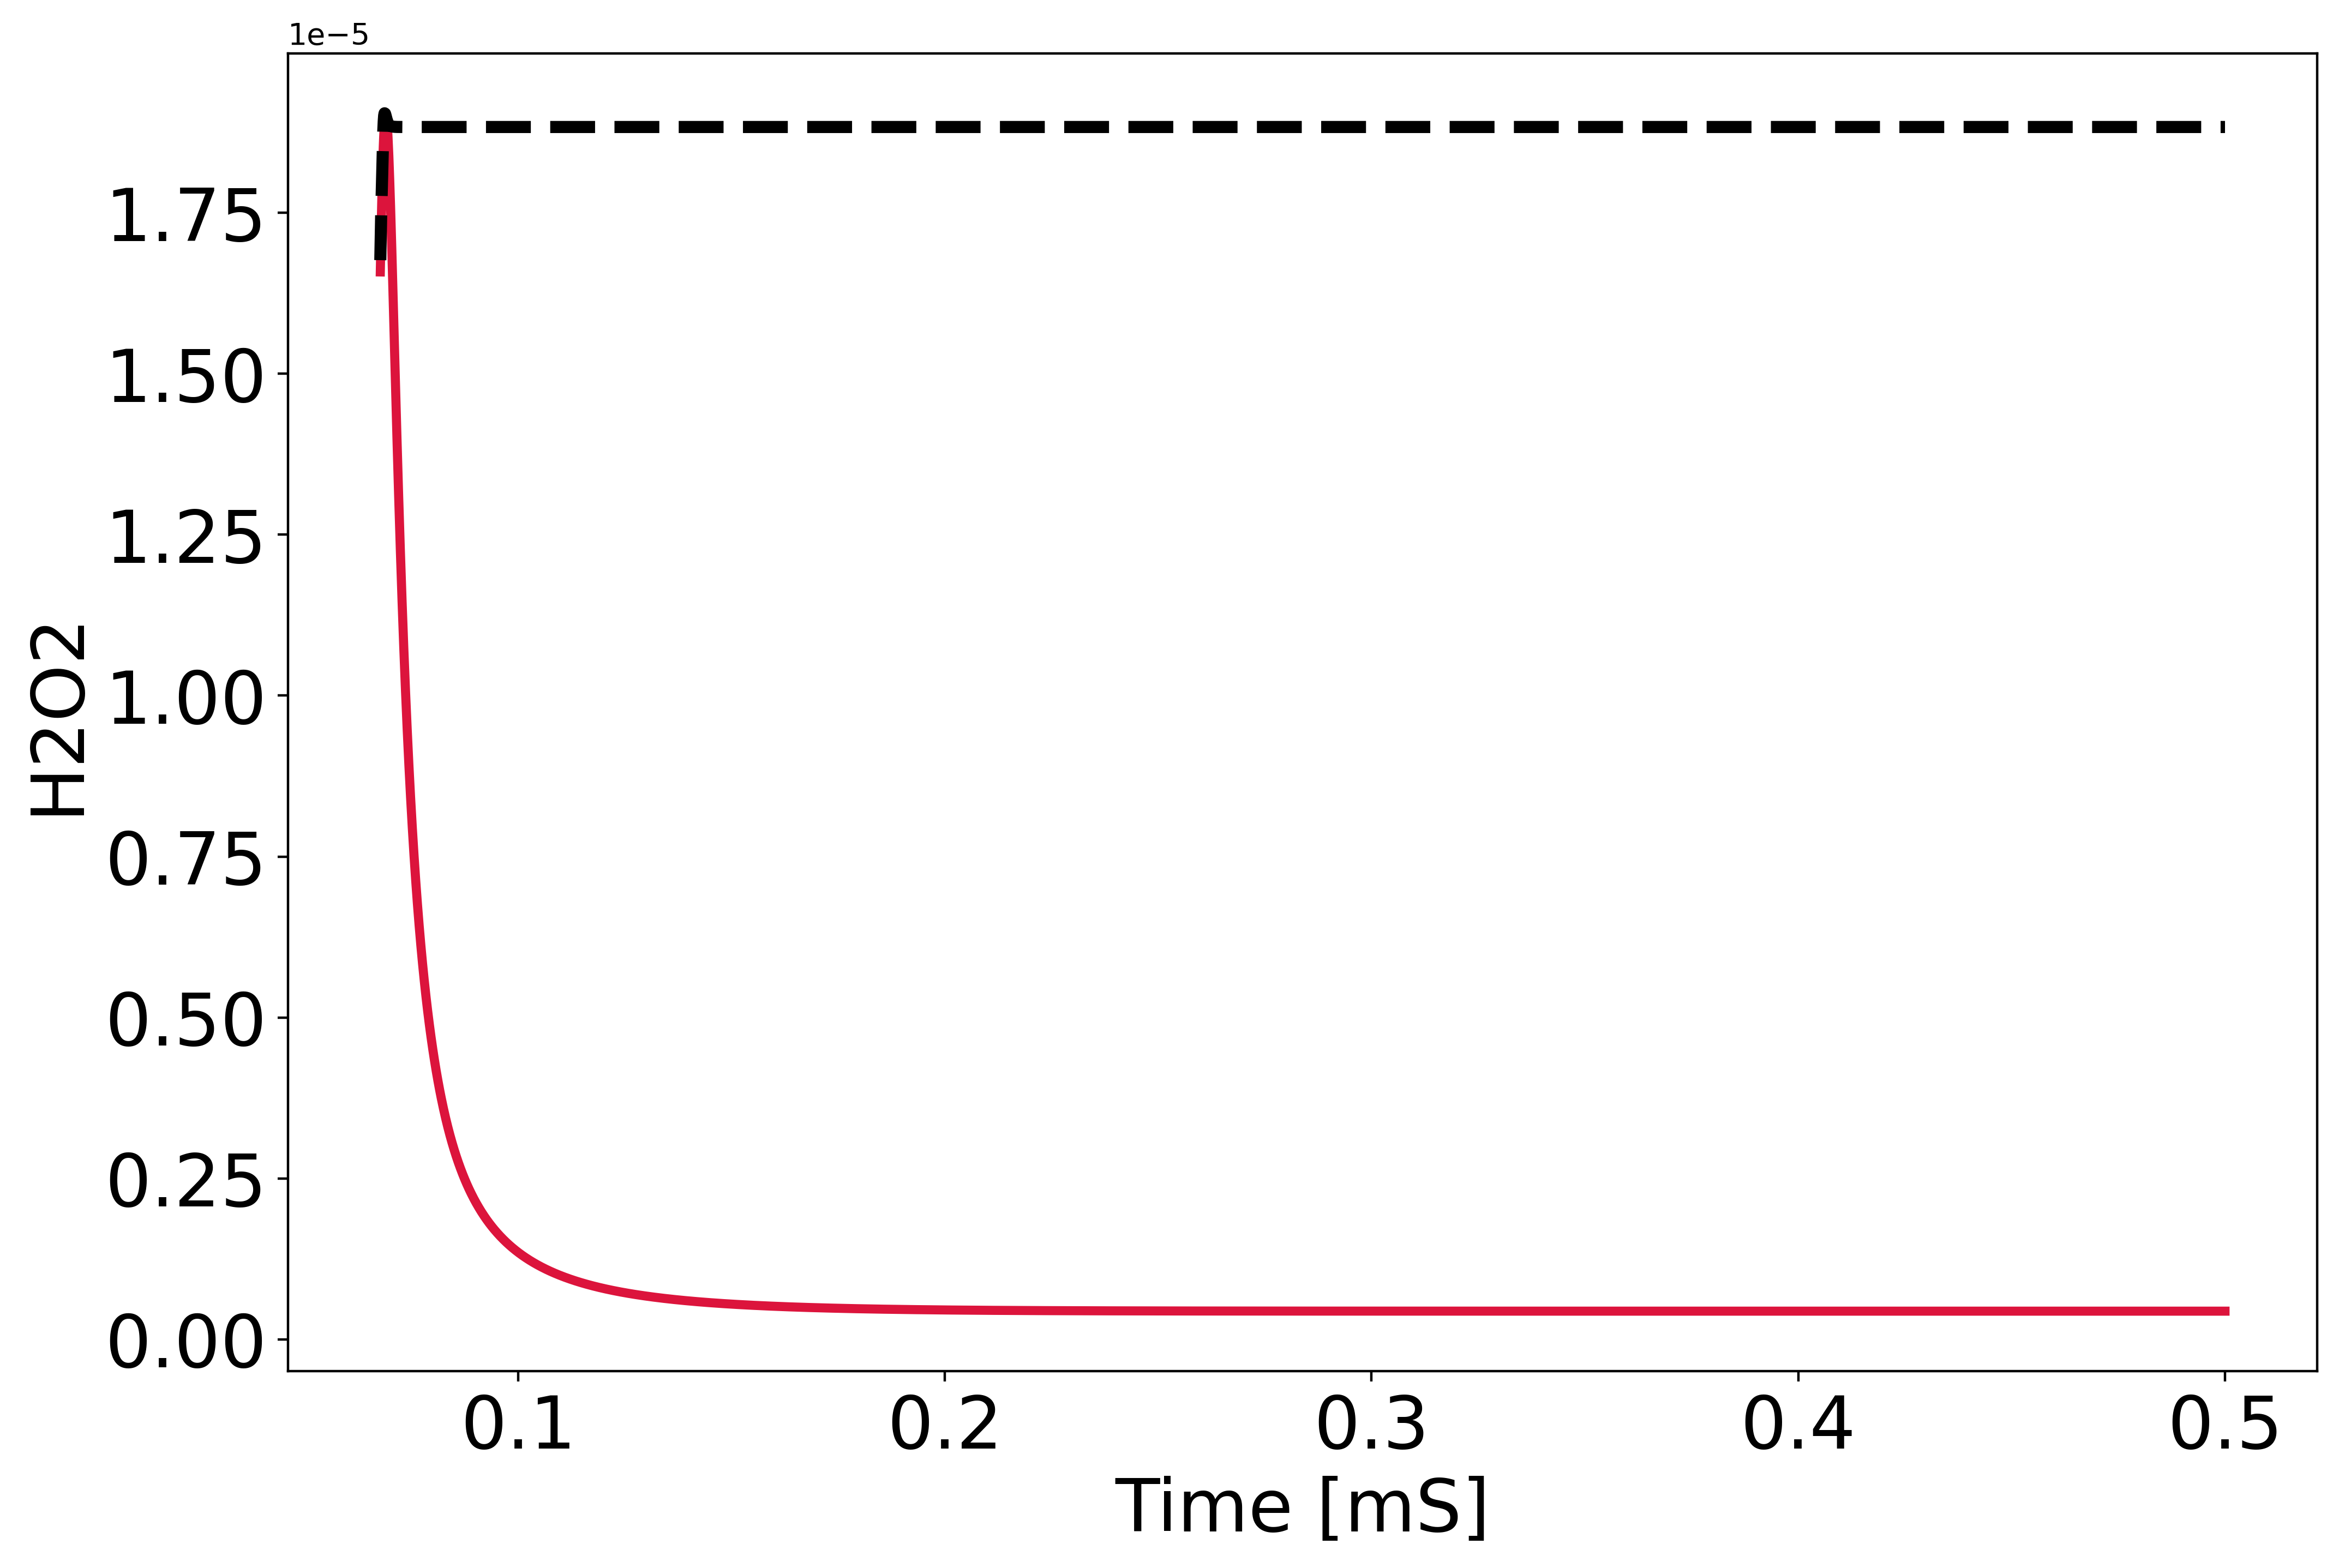

In [17]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset_copy.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset_copy.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(model_outputs.iloc[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k,figsize=(12,8),dpi=400)
    plt.plot(time_plot*1000,original, color='crimson', linewidth=3,label=input_label)
    plt.plot(time_plot*1000,output, color='k', linewidth=4, linestyle='dashed', label=output_label)
    #plt.title(interest_vector[k]+' plot results')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlabel('Time [mS]', fontsize=24)
    plt.ylabel(interest_vector[k], fontsize=24)
    plt.savefig('time_integration_'+interest_vector[k]+'case'+str(k1)+'.jpg',dpi=400)
    
    #plt.legend()

In [18]:
from sklearn.metrics import mean_absolute_error
all_scores=np.zeros(1+n_columns_mass_fraction)

for i in range(1+n_columns_mass_fraction):
    all_scores[i]=mean_absolute_error(dataset_copy.iloc[:,i+1],model_outputs.iloc[:,i])

In [19]:
all_scores

array([0.35563921, 0.06723311, 0.78309967, 0.15831079, 0.13077064,
       0.65360307, 0.21977024, 0.20880159, 0.84020364])